# Brief

The project is dedicated to Churn rate analysis in Model Fitness. The main task of the project is to analyse features and build ML model.

**Step 1. Download the data**

- Download libraries
- Download the data

**Step 2. Carry out exploratory data analysis (EDA)**

- Look at the dataset
- Look at the mean feature values in two groups
- Plot bar histograms and feature distributions for those who left (churn) and those who stayed
- Build a correlation matrix and display it

**Step 3. Build a model to predict user churn**

- Divide the data into train and validation sets
- Train the model on the train set
- Evaluate accuracy, precision, and recall for both models using the validation data

**Step 4. Create user clusters**

- Standardize the data
- Build a matrix of distances based on the standardized feature matrix and plot a dendrogram
- Train the clustering model with the K-means algorithm and predict customer clusters
- Look at the mean feature values for clusters
- Plot distributions of features for the clusters
- Calculate the churn rate for each cluster 

**Step 5. Come up with conclusions and basic recommendations on working with customers**

# Step 1. Download the data

In [1]:
# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Download the data

path = '/datasets/'
data = pd.read_csv(path+'gym_churn_us.csv')

# Step 2. Carry out exploratory data analysis (EDA)

In [3]:
# Look at the dataset

print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Dataset doesn't contain any missing values.

In [4]:
print(data.head(5))
data.describe()

   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0  

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [5]:
# Mean feature values in two groups

churn_group = data.groupby('Churn', as_index = False).agg(lambda x : x.mean())
churn_group

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Both groups have almost the same number of men and women. Most low churn clients live close to the gym. Partner feature mean is higher for those who are less likely to leave. Promo friends are also higher for a 0 churn rate. Phone mean value is almost the same for both groups. Mean contract_period 5.74 for 0 churn rate versus 1.7 for 1 churn rate.

Group_visits mean is higher for 0 churn rate. The mean Age for 0 churn rate is 29.9 versus 26.9 for one churn rate. Avg_additional_charges_total are 158.4 for 0 group and 115 for 1 group. Month_to_end_contract is 4 times bigger for 0 churn rate. Lifetime for 0 churn is 4.7, and 0.99 for one churn rate. On average, people with a 0 churn rate attend classes almost twice as often.

The most important features are Near_Location, Partner, Promo_friends, Contract_period, Group_visits, Age, Avg_additional_charges_total, Month_to_end_contract, Lifetime, Avg_class_frequency_total, and Avg_class_frequency_current_month.

In [6]:
# Plot bar histograms and feature distributions for those who left (churn) and those who stayed

datac0 = data[data['Churn'] == 0]
datac1 = data[data['Churn'] == 1]

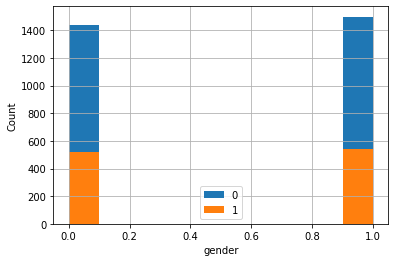

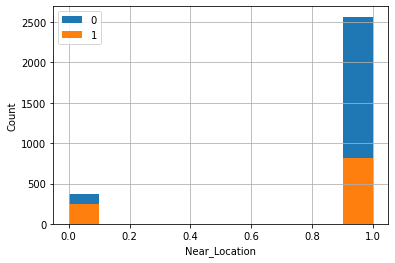

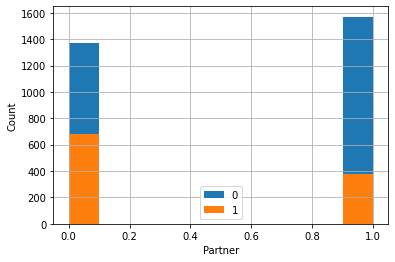

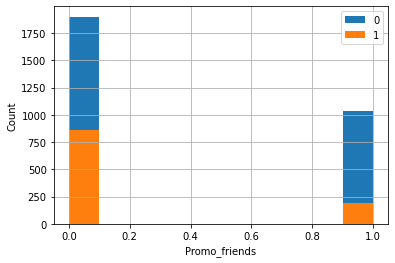

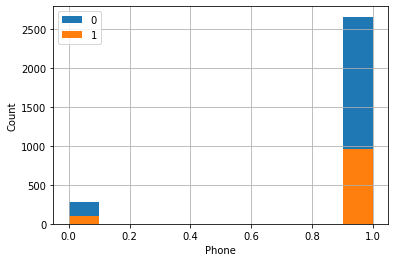

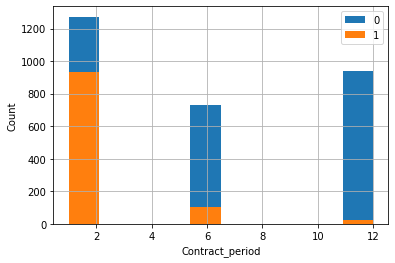

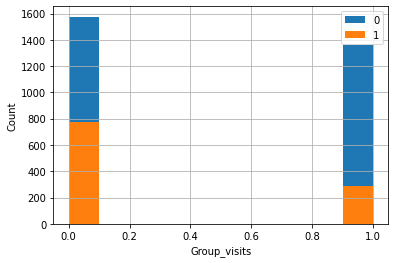

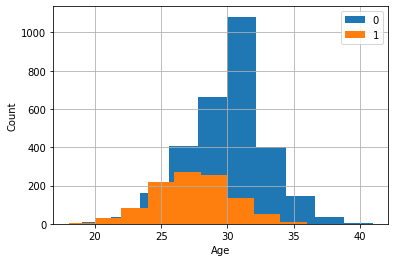

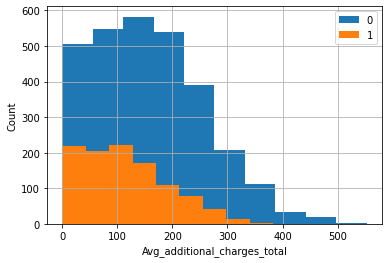

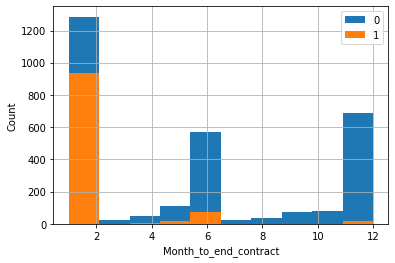

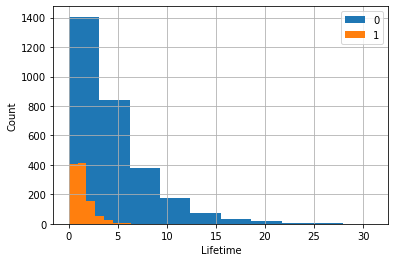

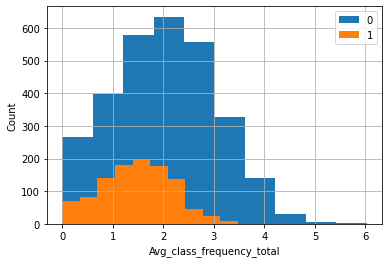

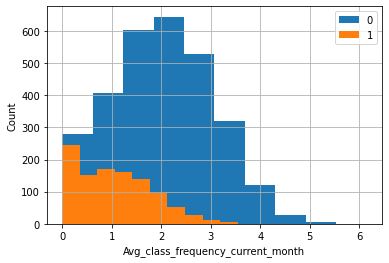

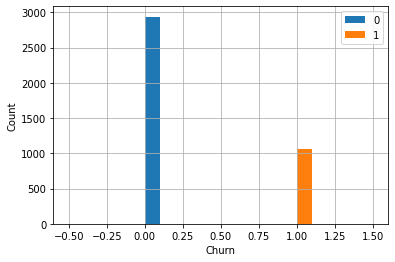

In [7]:
for col1 in datac0.columns:
    for col2 in datac1.columns:
        if col1 == col2:
            plt.figure(figsize = (6,4))
            datac0[col1].hist()
            datac1[col2].hist()
            plt.xlabel(col1)
            plt.ylabel('Count')
            plt.legend('01')
            plt.show()

Age for churn 0 is distributed around 31-32, and for churn 1 – around 24-30. There are more people with 0 partner value in 1 churn group. The 1st churn group contract period with 12 months has the lowest values. Average additional charges are distributed the same way for both groups. 

Lifetime is lower for churn group 1, and average class frequency is lower for one churn rate. The total number of people in churn 1 is lower than in churn 0.

<AxesSubplot:>

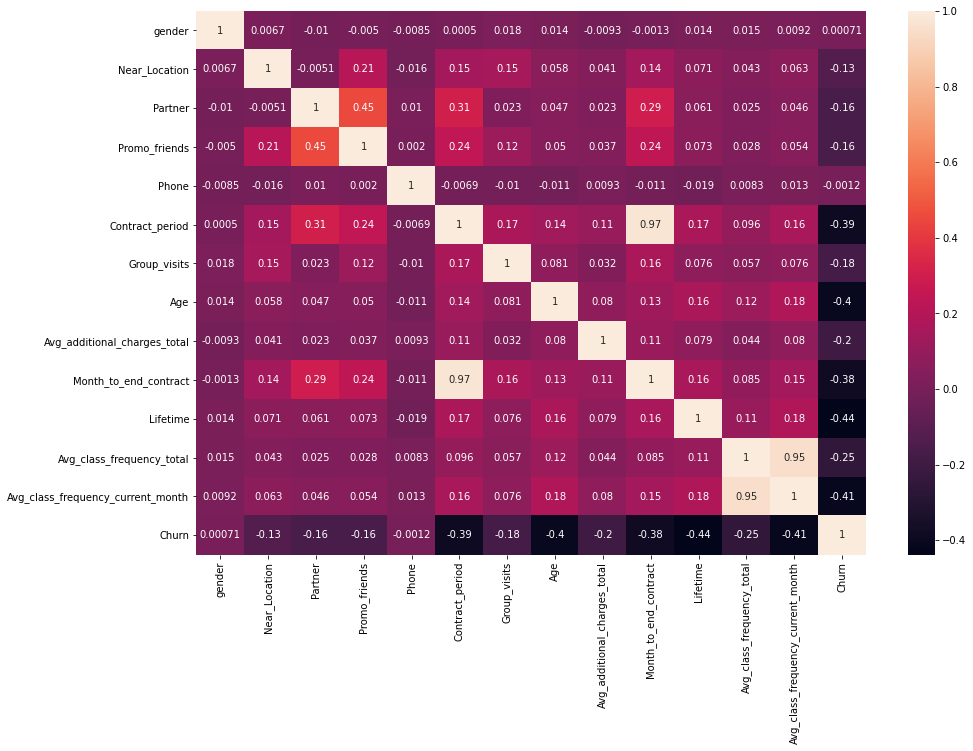

In [8]:
# Build a correlation matrix and display it

plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot=True)

According to the graph, we can see the strongest correlation between average class frequency total and average class frequency this month. Also, there is a strong correlation between the contract period and the month-to-end contract. 

There is also a correlation between partner and promo_friends. 
The contract period negatively correlates with a partner, promo friends, and near a location. It probably indicates that the client works near the gym, which is included in his work.

There is no strong correlation between churn and other features. 

# Step 3. Build a model to predict user churn

In [9]:
# Build a binary classification model for customers where the target feature is the user's leaving next month.

X = data.drop(columns = ['Churn'])
y = data['Churn']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)
X_test_st = scaler.transform(X_test)

In [10]:
# LogisticRegression

model = LogisticRegression(random_state=0)

model.fit(X_train_st, y_train)

predictions = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]

print('Logistic regression metrics')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, predictions)))
print('Precision: {:.2f}'.format(precision_score(y_test, predictions)))
print('Recall: {:.2f}'.format(recall_score(y_test, predictions)))
print('F1: {:.2f}'.format(f1_score(y_test, predictions)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, probabilities)))

false_positive_rate = 1 - precision_score(y_test, predictions)
print(false_positive_rate)

Logistic regression metrics
Accuracy: 0.94
Precision: 0.94
Recall: 0.84
F1: 0.89
ROC_AUC: 0.98

0.06282722513089001


Accuracy of Logistic regression model is rather high - 93%. Precision is 91% and recall is 86%.

In [11]:
# RandomForestClassifier

model = RandomForestClassifier(random_state=0)
model.fit(X_train_st, y_train)

y_pred = model.predict(X_test_st)
probabilities = model.predict_proba(X_test_st)[:,1]

print('Random Forest Classifier metrics')
print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('Precision: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1: {:.2f}'.format(f1_score(y_test, y_pred)))
print('ROC_AUC: {:.2f}\n'.format(roc_auc_score(y_test, probabilities)))

false_positive_rate = 1 - precision_score(y_test, y_pred)
print(false_positive_rate)

Random Forest Classifier metrics
Accuracy: 0.93
Precision: 0.89
Recall: 0.82
F1: 0.86
ROC_AUC: 0.98

0.1071428571428571


Logistic regression metrics shows 93% of Accuracy (against 91% for Random Forest Classifier). Precision is 91% for LR (against 88% for RFC). Recall is 86% (against 79%). F1 for LR is 0.88 against 0.83 for RFC. ROC_AUC is 0.97 for LR and 0.96 for RFC. False positive rate for Logistic regression is 9%, and 12% for Random Forest Classifier.

We can see that Logistic regression is more accurate and shows better results.

# Step 4. Create user clusters

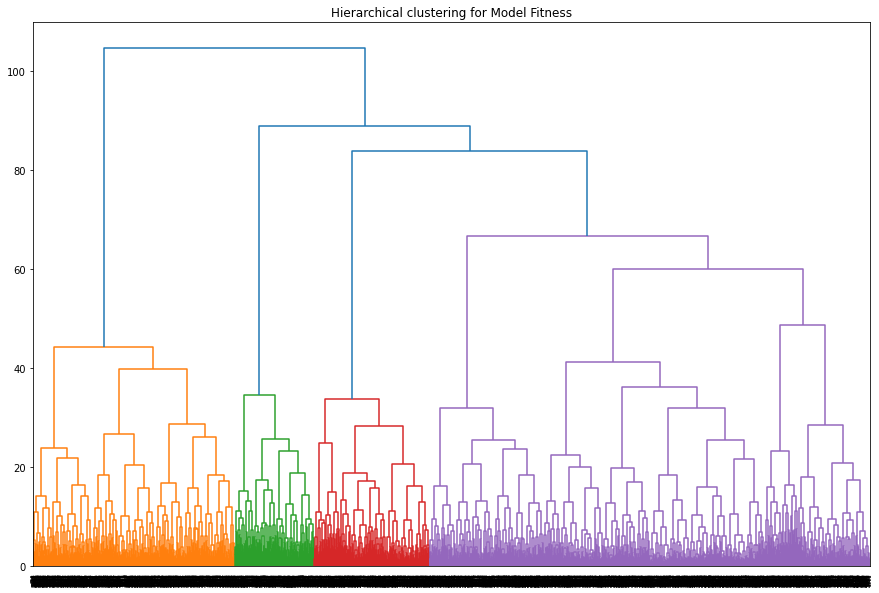

In [12]:
# Build a matrix of distances based on the standardized feature matrix and plot a dendrogram

x_sc = scaler.fit_transform(data.drop(columns = ['Churn']))

linked = linkage(x_sc, method = 'ward')

plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering for Model Fitness')
plt.show()

In [13]:
# Train the clustering model with the K-means algorithm and predict customer clusters.

km = KMeans(n_clusters = 5)

labels = km.fit_predict(x_sc)
data['cluster_km'] = labels

In [14]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (10,10))
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} vs {}'.format(x_name, y_name))
    plt.show()

In [15]:
# Look at the mean feature values for clusters

display(data.groupby('cluster_km').mean())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
cluster_km,,,,,,,,,,,,,,
0,0.519971,1.000000,0.161220,0.073348,1.000000,1.587509,0.365287,28.665940,138.357101,1.523602,3.002179,1.647378,1.467608,0.423384
1,0.497116,0.994233,0.888120,0.747405,1.000000,7.489043,0.495963,29.153403,148.884460,6.882353,4.016148,1.291155,1.220693,0.163783
2,0.505924,0.962085,0.626777,0.389810,0.996445,8.136256,0.518957,30.379147,167.057870,7.401659,5.041469,2.992802,2.996701,0.010664
3,0.527415,0.861619,0.469974,0.302872,0.000000,4.720627,0.422977,29.281984,143.677915,4.420366,3.921671,1.837193,1.706021,0.268930
4,0.500945,0.000000,0.465028,0.075614,1.000000,2.591682,0.219282,28.606805,136.387284,2.431002,2.884688,1.698751,1.524289,0.423440


We can see that Near location for cluster 4 is 0. Partner mean is higher for cluster 1. 1st cluster doesn't store phone numbers. Contract_period is higher for cluster 1. Month_to_end_contract is higher for cluster 0. Avg_class_frequency_current_month in cluster 3 is low. Churn rates are higher for clusters 3 and 4 and very low for clusters 0 and 2.

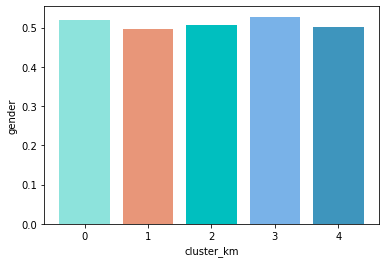

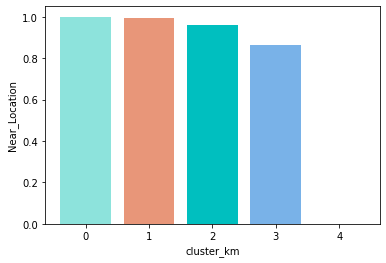

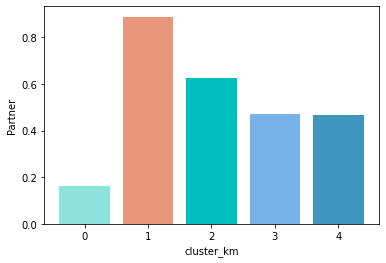

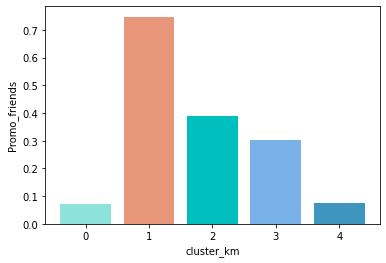

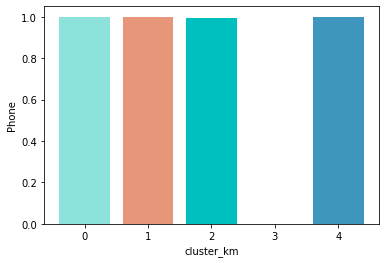

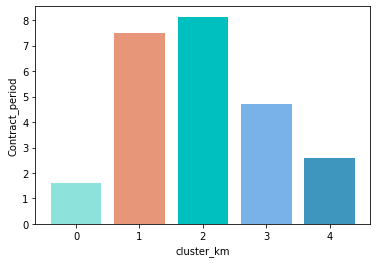

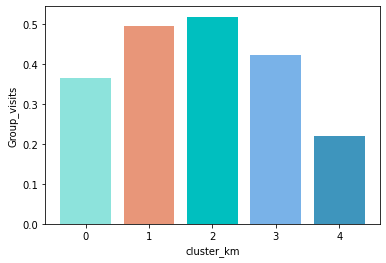

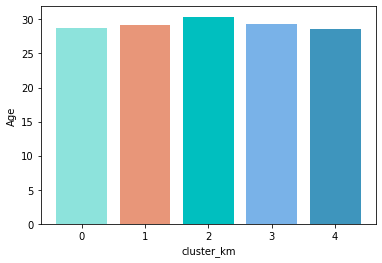

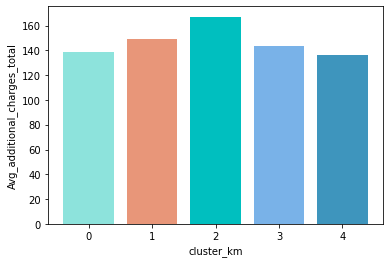

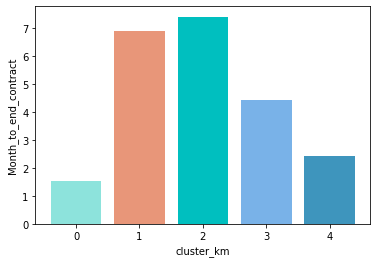

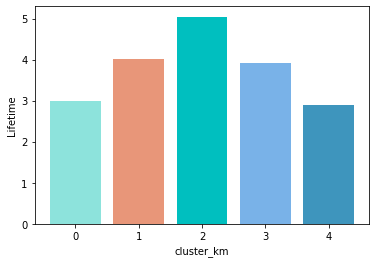

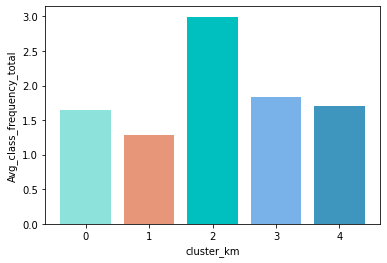

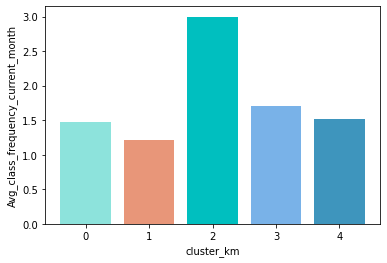

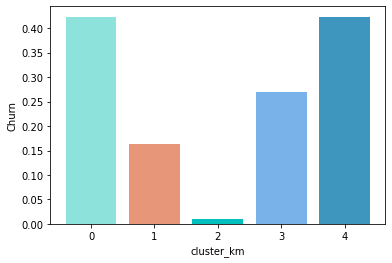

In [16]:
# Plot distributions of features for the clusters

datam = data.groupby('cluster_km').mean()

for column in datam.columns: 
    plt.figure(figsize = (6,4))
    plt.bar(x=datam.index, height=datam[column], color = ['#8de3dc', '#e89679', 'c', '#79b2e8', '#3e95bd'])
    plt.xlabel('cluster_km')
    plt.ylabel(column)
    plt.show()

We can see that gender distribution for all clusters is approximately the same. Cluster 1 has only 0 values in the near_location column. The average class frequency is higher for cluster 3. Cluster 4 has the most significant amount of months till the end of the contract. Partner values are higher for the 4th cluster. The churn rate is low for the 4th and 3rd groups and high for the 1st and 2nd clusters.

# Step 5. Come up with conclusions and basic recommendations on working with customers

Draw conclusions and formulate recommendations regarding the strategy for customer interaction and retention.
You don't need to go into detail. Three or four essential principles and examples of their implementation in the form of specific marketing steps will do.

We figured out that the most important features are Near_Location, Partner, Promo_friends, Contract_period, Group_visits, Age, Avg_additional_charges_total, Month_to_end_contract, Lifetime, Avg_class_frequency_total and Avg_class_frequency_current_month. 

The average class frequency total is higher for churn 0, and the most recent values here are those for more than six classes.

The accuracy of the Logistic regression model is relatively high - 93%. Precision is 91%, and recall is 86%. The false-positive rate is 9%.

Gender distribution for all clusters is the same. Cluster 1 has only 0 values in the near_location column. The average class frequency is higher for cluster 3. Cluster 4 has the most significant amount of months till the end of the contract. Partner values are higher for the 4th cluster. The churn rate is low for the 4th and 3rd groups and high for the 1st and 2nd clusters. 

According to cluster analysis, we can conclude that users who attend 1,5 classes monthly, whose lifetime is 2,5 or less, and contract period is less than two months, and whose age is less than 28,5 years, are more likely to leave the gym. This cluster also has no partner value. 

First of all, it is essential to increase the retention rate for these groups. For example, the gym can create more activities (for instance, yoga classes, dance classes, etc.).

The second step is to ensure that users extend their contract, so more than two months are left until its end. A discount for beforehand payment can help.

It is also recommended to enter into partnership agreements with companies whose offices are located around, to attract more clients close to the gym.